In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

<h1> Первая часть (Загрузка данных) </h1>

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
print(f'shape train data {train_data.shape}')
print(f'shape test data {test_data.shape}')

shape train data (5282, 20)
shape test data (1761, 19)


In [5]:
train_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
test_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

<p style='font-size: 22px'> Вывод: нет пропущенных значений как в train, так и в test </p>

<h1> Вторая часть (Анализ данных) </h1>

In [7]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

<h3> 2.1 Проанализируем численные признаки </h3>

<h4> 2.1.1 ClientPeriod </h4>

In [8]:
train_data.ClientPeriod.describe()

count    5282.000000
mean       32.397009
std        24.550326
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: ClientPeriod, dtype: float64

<AxesSubplot:>

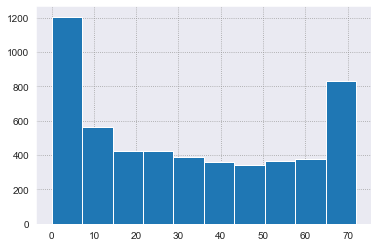

In [9]:
train_data.ClientPeriod.hist()

<h4> 2.1.2  MonthlySpending</h4>

In [10]:
train_data.MonthlySpending.describe()

count    5282.000000
mean       64.924754
std        30.176464
min        18.250000
25%        35.462500
50%        70.400000
75%        90.050000
max       118.750000
Name: MonthlySpending, dtype: float64

<AxesSubplot:>

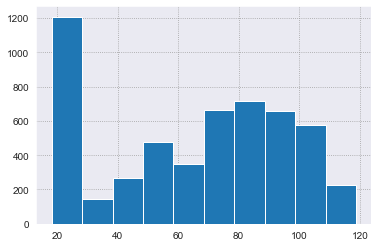

In [11]:
train_data.MonthlySpending.hist()

<h4> 2.1.3  TotalSpent</h4>

In [12]:
train_data.TotalSpent.value_counts().sort_values(ascending=False)

           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
5293.95    1
1021.75    1
7317.1     1
662.65     1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

In [13]:
train_data.TotalSpent[train_data.TotalSpent == ' '] = 0
test_data.TotalSpent[test_data.TotalSpent == ' '] = 0

In [14]:
train_data.TotalSpent.value_counts().sort_values(ascending=False)

0          9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
5293.95    1
1021.75    1
7317.1     1
662.65     1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

In [15]:
train_data.TotalSpent = train_data.TotalSpent.apply(lambda x: float(x))

In [16]:
train_data.TotalSpent.describe()

count    5282.000000
mean     2287.486161
std      2269.049195
min         0.000000
25%       395.725000
50%      1405.650000
75%      3795.212500
max      8684.800000
Name: TotalSpent, dtype: float64

<AxesSubplot:>

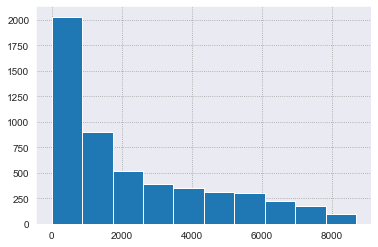

In [17]:
train_data.TotalSpent.hist()

In [18]:
print(f'relation >6000 / all in data.TotalSpent {train_data[train_data.TotalSpent > 6000].shape[0] / train_data.shape[0]}')

relation >6000 / all in data.TotalSpent 0.09769026883756153


<p style='font-size: 22px'> Идея: откинем все примеры, где TotalSpent > 6000 </p>

In [19]:
print(f'shape train data: {train_data.shape}')
train_data = train_data[train_data.TotalSpent < 6000]
print(f'new shape train data: {train_data.shape}')

shape train data: (5282, 20)
new shape train data: (4766, 20)


<h3> 2.2 Проанализируем категориальные признаки <h3>

In [20]:
# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [21]:
for cat_col in cat_cols:
    print(f'feauter: {cat_col}. \nCount unique: {train_data[cat_col].unique().shape[0]}')

feauter: Sex. 
Count unique: 2
feauter: IsSeniorCitizen. 
Count unique: 2
feauter: HasPartner. 
Count unique: 2
feauter: HasChild. 
Count unique: 2
feauter: HasPhoneService. 
Count unique: 2
feauter: HasMultiplePhoneNumbers. 
Count unique: 3
feauter: HasInternetService. 
Count unique: 3
feauter: HasOnlineSecurityService. 
Count unique: 3
feauter: HasOnlineBackup. 
Count unique: 3
feauter: HasDeviceProtection. 
Count unique: 3
feauter: HasTechSupportAccess. 
Count unique: 3
feauter: HasOnlineTV. 
Count unique: 3
feauter: HasMovieSubscription. 
Count unique: 3
feauter: HasContractPhone. 
Count unique: 3
feauter: IsBillingPaperless. 
Count unique: 2
feauter: PaymentMethod. 
Count unique: 4


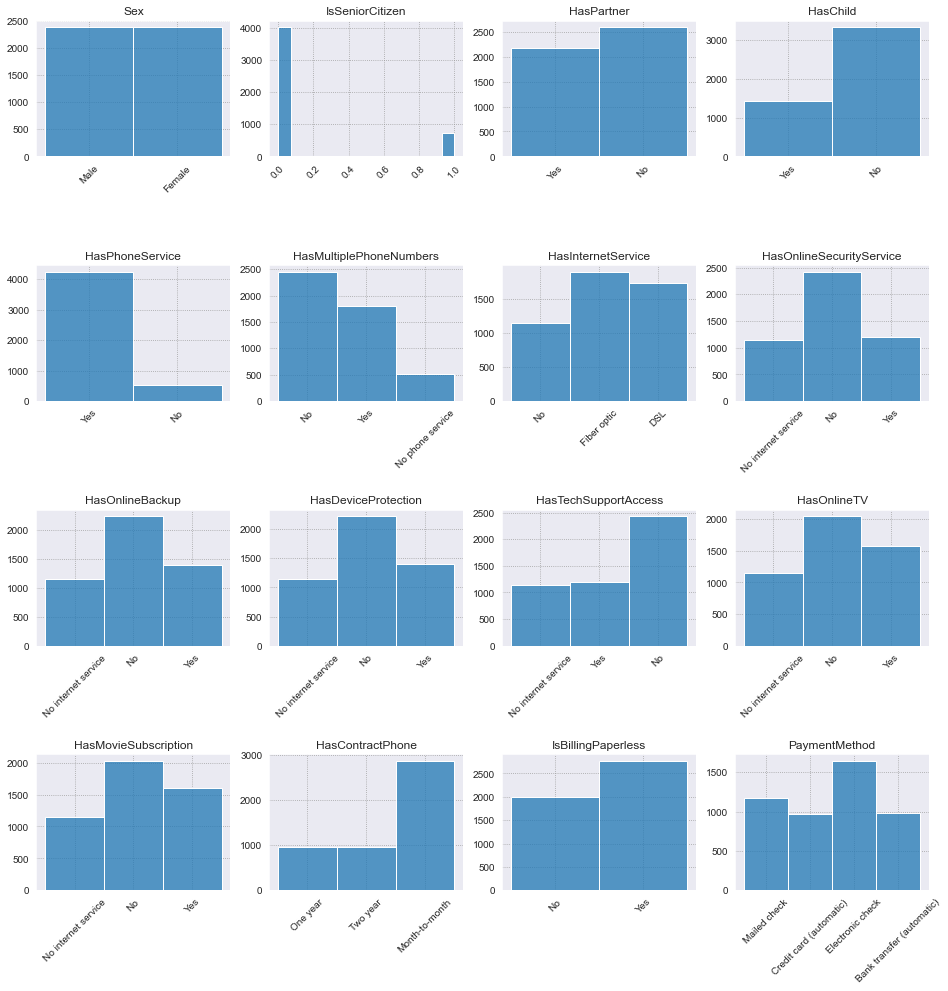

In [22]:
row_nums, col_nums = 4, 4
fig, axes = plt.subplots(row_nums, col_nums, figsize=(16,16))
plt.subplots_adjust(hspace = 0.8)
for ax, cat_col in zip(axes.ravel(), cat_cols):
    sns.histplot(data=train_data, x=cat_col, ax=ax)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_title(cat_col)
    ax.tick_params(axis='x', rotation=45)

<h1> Третья часть (Применение линейных моделей) </h1>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm

In [24]:
target = train_data.Churn
train_data.drop(['Churn'], axis=1, inplace=True)

<h3> 3.1 Применение OHE к категориальным данным<h3>

<p> Замечание: можно удалить один из классов у тех кат-ных данных, где всего 2 класса </p>

In [25]:
train_data = pd.get_dummies(train_data, columns=cat_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=cat_cols, drop_first=True)

<h3> 3.2 разбиваем на train and test (так как сам файл test только лишь для проверки, а нам нужно проверять свои результаты на куске из train)<h3>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, train_size=0.8, random_state=42)

<h3> 3.3 Применение нормализацию<h3>

In [27]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
train_data[num_cols] = scaler.transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

<h3> 3.4 Обучение </h3>

In [28]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 20, 50]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [5, 10, 20, 30, 50, 100, 200],
            'min_samples_split': [3, 5, 10, 15],
            'max_depth': [2, 3, 5]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20], 
            'kernel': ['rbf', 'linear']
        }
    }
}

In [29]:
best_score_models = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, item in tqdm(model_params.items()):
    clf_CV = GridSearchCV(
        item['model'],
        item['params'],
        cv=kf,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=10
    )
    clf_CV.fit(X_train, y_train)
    best_score_models.append({
        'model': name,
        'best_score': clf_CV.best_score_,
        'best_params': clf_CV.best_params_,
        'best_estimator': clf_CV.best_estimator_
    })

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [30]:
scores = pd.DataFrame(best_score_models)
scores.iloc[:, :2]

,model,best_score
0,logistic_regression,0.850592
1,random_forest,0.845939
2,svm,0.838258


In [31]:
#df = pd.DataFrame(scores.best_estimator[0].predict(test_data)).reset_index()
#df.columns = ['Id', 'Churn']
#df.to_csv('logistic_regression_result.csv', index=False)

<h1> Чётвёртая часть (Градиентный бустинг) </h1>

<h3> 4.1 XGBoost </h3>

In [34]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [35]:
params = {
     'eta': [0.05, 0.1, 0.15, 0.3, 0.5],
     'max_depth': [3, 7, 10, 12],
     'min_child_weight': [6, 7, 8, 9],
     'gamma': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 1000, 10000],
}
xgb_CV = RandomizedSearchCV(
    xgboost.XGBClassifier(),
    params,
    cv=kf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=10
)
xgb_CV.fit(X_train, y_train)
print(f'best params: {xgb_CV.best_params_}')
print(f'best score: {xgb_CV.best_score_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best params: {'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 3, 'gamma': 0.1, 'eta': 0.05}
best score: 0.8482437075053741


In [98]:
#df = pd.DataFrame(xgb_CV.best_estimator_.predict_proba(test_data)[:,1]).reset_index()
#df.columns = ['Id', 'Churn']
#df.to_csv('xgb_boost_result.csv', index=False)

<h3> 4.2 CatBoost </h3>

In [43]:
import catboost

In [116]:
train_data_cb = pd.read_csv('train.csv')
test_data_cb = pd.read_csv('test.csv')

In [107]:
train_data_cb.TotalSpent[train_data_cb.TotalSpent == ' '] = 0
test_data_cb.TotalSpent[test_data_cb.TotalSpent == ' '] = 0

In [108]:
train_data_cb.TotalSpent = train_data_cb.TotalSpent.apply(lambda x: float(x))
test_data_cb.TotalSpent = test_data_cb.TotalSpent.apply(lambda x: float(x))
train_data_cb = train_data_cb[train_data_cb.TotalSpent < 6000]
target = train_data_cb.Churn
train_data_cb.drop(['Churn'], axis=1, inplace=True)

In [109]:
train_data_cb[num_cols] = scaler.transform(train_data_cb[num_cols])
test_data_cb[num_cols] = scaler.transform(test_data_cb[num_cols])

In [110]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(train_data_cb, target, train_size=0.8, random_state=42)

In [76]:
params = {
        'learning_rate': [0.001, 0.01, 0.03, 0.1, ],
        'min_data_in_leaf': [5, 10, 12, 15],
        'depth': [2, 3, 5, 10],
        'iterations': [50, 100, 120, 150]
}
clf_cb = catboost.CatBoostClassifier(cat_features=cat_cols, random_state=42)
result = clf_cb.grid_search(params, X_train_cb, y_train_cb)

0:	learn: 0.6926676	test: 0.6926968	best: 0.6926968 (0)	total: 197ms	remaining: 9.64s
1:	learn: 0.6921920	test: 0.6922472	best: 0.6922472 (1)	total: 204ms	remaining: 4.89s
2:	learn: 0.6917134	test: 0.6917977	best: 0.6917977 (2)	total: 210ms	remaining: 3.29s
3:	learn: 0.6912452	test: 0.6913667	best: 0.6913667 (3)	total: 216ms	remaining: 2.49s
4:	learn: 0.6907865	test: 0.6909306	best: 0.6909306 (4)	total: 222ms	remaining: 2s
5:	learn: 0.6903529	test: 0.6905048	best: 0.6905048 (5)	total: 229ms	remaining: 1.68s
6:	learn: 0.6898942	test: 0.6900577	best: 0.6900577 (6)	total: 235ms	remaining: 1.45s
7:	learn: 0.6894439	test: 0.6896603	best: 0.6896603 (7)	total: 242ms	remaining: 1.27s
8:	learn: 0.6889907	test: 0.6892248	best: 0.6892248 (8)	total: 248ms	remaining: 1.13s
9:	learn: 0.6885261	test: 0.6887796	best: 0.6887796 (9)	total: 253ms	remaining: 1.01s
10:	learn: 0.6880801	test: 0.6883825	best: 0.6883825 (10)	total: 259ms	remaining: 919ms
11:	learn: 0.6876117	test: 0.6879466	best: 0.6879466 (1

In [83]:
print(result['params'])

{'min_data_in_leaf': 5, 'depth': 3, 'iterations': 150, 'learning_rate': 0.03}


In [111]:
catboost_clf = catboost.CatBoostClassifier(min_data_in_leaf=5, depth=3, iterations=150, learning_rate=0.03, cat_features=cat_cols, random_state=42)
catboost_clf.fit(X_train_cb, y_train_cb)

0:	learn: 0.6834460	total: 8.44ms	remaining: 1.26s
1:	learn: 0.6740044	total: 14.8ms	remaining: 1.1s
2:	learn: 0.6650503	total: 23.1ms	remaining: 1.13s
3:	learn: 0.6564110	total: 30.8ms	remaining: 1.12s
4:	learn: 0.6477648	total: 38.5ms	remaining: 1.12s
5:	learn: 0.6401043	total: 46.1ms	remaining: 1.1s
6:	learn: 0.6327967	total: 53.3ms	remaining: 1.09s
7:	learn: 0.6258284	total: 60.5ms	remaining: 1.07s
8:	learn: 0.6190258	total: 67.9ms	remaining: 1.06s
9:	learn: 0.6127297	total: 74.2ms	remaining: 1.04s
10:	learn: 0.6062892	total: 81.2ms	remaining: 1.03s
11:	learn: 0.6009072	total: 88.7ms	remaining: 1.02s
12:	learn: 0.5952410	total: 96ms	remaining: 1.01s
13:	learn: 0.5898417	total: 103ms	remaining: 1s
14:	learn: 0.5846251	total: 111ms	remaining: 996ms
15:	learn: 0.5794566	total: 118ms	remaining: 989ms
16:	learn: 0.5744308	total: 125ms	remaining: 981ms
17:	learn: 0.5695860	total: 133ms	remaining: 972ms
18:	learn: 0.5650327	total: 140ms	remaining: 965ms
19:	learn: 0.5605373	total: 148ms	r

In [122]:
print(f'roc_auc catboost: {roc_auc_score(y_test_cb, catboost_clf.predict_proba(X_test_cb)[:,1])}')

roc_auc catboost: 0.8301380517207857


In [118]:
#df = pd.DataFrame(catboost_clf.predict_proba(test_data_cb)[:,1]).reset_index()
#df.columns = ['Id', 'Churn']
#df.to_csv('catboost_result.csv', index=False)